In [11]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [112]:
df = pd.read_csv("heart.csv")

| | |
|-|-|
|age|               in years|
|sex |              (1 = male; 0 = female)|
|cp |               chest pain type|
|trestbps| resting blood pressure (in mm Hg on admission to the hospital)|
|chol| serum cholestoral in mg/dl|
|fbs |(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|
|restecg |resting electrocardiographic results|
|thalach| maximum heart rate achieved|
|exang |exercise induced angina (1 = yes; 0 = no)|
|oldpeak| ST depression induced by exercise relative to rest|
|slope| the slope of the peak exercise ST segment|
|ca| number of major vessels (0-3) colored by flourosopy|
|thal| 3 = normal; 6 = fixed defect; 7 = reversable defect|
|target| 1 or 0 |

In [124]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'ac'],
      dtype='object')

In [114]:
# age_bins = pd.cut(x=df['age'], bins=[20, 40, 50, 60])
df['ac'] = pd.cut(x=df['age'], bins=[0, 20, 40, 50, 70, 80], labels=[1,2,3, 4, 5])

In [115]:
df['ac'].isna().sum()

0

In [116]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ac
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,4
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,4
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,4
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,4
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,4


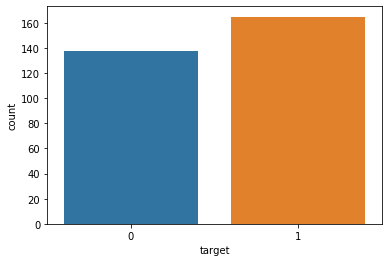

In [117]:
sns.countplot(x='target', data=df)

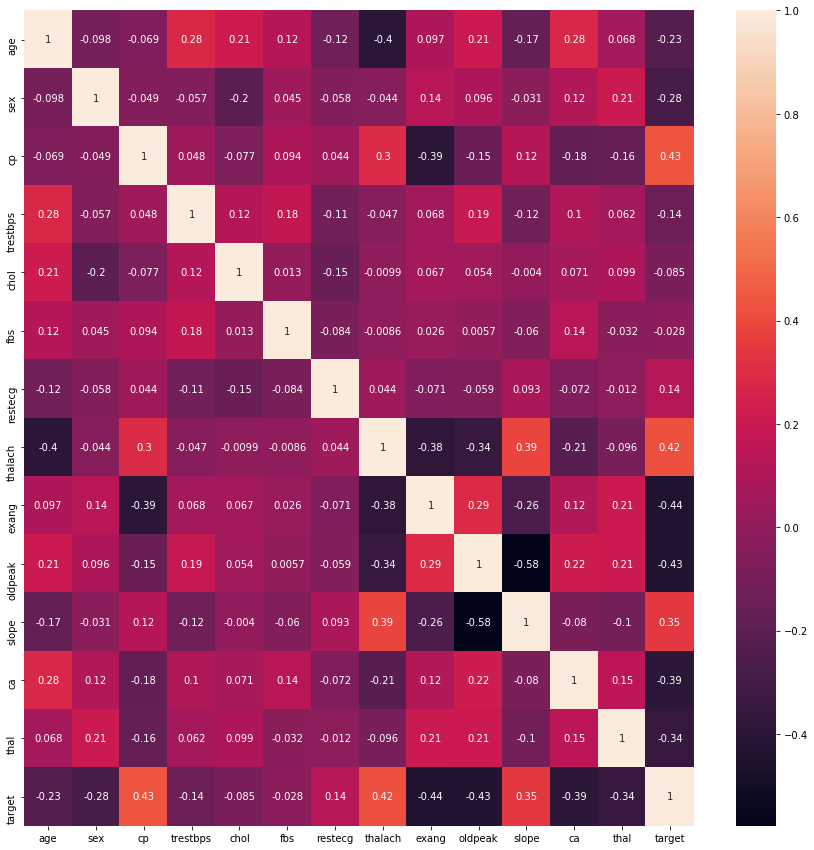

In [118]:
corrMatrix = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True)
# plt.figure(figsize=(30,10))
# fig, ax = plt.subplots(figsize=(40,20))
plt.show()

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:,['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'ac']], df.loc[:,'target'], test_size=0.20, random_state=42)

In [147]:
clf = LogisticRegression(random_state=0)
# clf = RandomForestClassifier()
# clf = GaussianNB()
# clf = GradientBoostingClassifier()
# clf = KNeighborsClassifier(n_neighbors=17)

In [148]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [149]:
predictions = clf.predict(X_test)

In [150]:
accuracy_score(y_test, predictions)

0.7704918032786885